In [6]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion

TRAIN_DIR = 'train'
TEST_DIR = 'test'
IMG_SIZE = 50
LR = 1e-3

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic') # just so we remember which saved model is which, sizes must match

In [7]:
def label_img(img):
    word_label = img.split('.')[-3]
    # conversion to one-hot array [cat,dog]
    #                            [much cat, no dog]
    if word_label == 'cat': return [1,0]
    #                             [no cat, very doggo]
    elif word_label == 'dog': return [0,1]

In [8]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [9]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [10]:
train_data = create_train_data()
# If you have already created the dataset:
#train_data = np.load('train_data.npy')

100%|██████████| 25000/25000 [05:39<00:00, 73.54it/s]


In [12]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [13]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

In [14]:
train = train_data[:-500]
test = train_data[-500:]

In [15]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

In [16]:
model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1148  | total loss: 12.04941 | time: 74.072s
| Adam | epoch: 003 | loss: 12.04941 - acc: 0.4767 -- iter: 24448/24500
Training Step: 1149  | total loss: 11.92380 | time: 75.260s
| Adam | epoch: 003 | loss: 11.92380 - acc: 0.4822 | val_loss: 11.55898 - val_acc: 0.4980 -- iter: 24500/24500
--


In [22]:


import tensorflow as tf
tf.reset_default_graph()



In [23]:
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')


In [24]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

train = train_data[:-500]
test = train_data[-500:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

model.fit({'input': X}, {'targets': Y}, n_epoch=10, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

model.save(MODEL_NAME)

Training Step: 3829  | total loss: 0.33220 | time: 81.216s
| Adam | epoch: 010 | loss: 0.33220 - acc: 0.8576 -- iter: 24448/24500
Training Step: 3830  | total loss: 0.32932 | time: 82.430s
| Adam | epoch: 010 | loss: 0.32932 - acc: 0.8593 | val_loss: 0.46081 - val_acc: 0.8100 -- iter: 24500/24500
--
INFO:tensorflow:/home/jimutbp/Desktop/DOG-CAT-CLASSIFIER/dogsvscats-0.001-2conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


In [26]:
ls

checkpoint                                              sample_submission.csv
dogsvscats-0.001-2conv-basic.model.data-00000-of-00001  test/
dogsvscats-0.001-2conv-basic.model.index                test.zip
dogsvscats-0.001-2conv-basic.model.meta                 train/
dogs-vs-cats-redux-kernels-edition.zip                  train_data.npy
log/                                                    train.zip
preprocessing.ipynb


In [27]:
test_data = process_test_data()


100%|██████████| 12500/12500 [02:57<00:00, 70.50it/s]


In [29]:
import numpy as np

np.save(test_data,'test_data.npy')

TypeError: expected str, bytes or os.PathLike object, not list

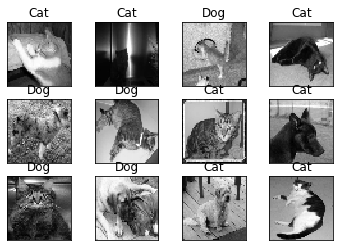

In [30]:
import matplotlib.pyplot as plt

# if you need to create the data:
#test_data = process_test_data()
# if you already have some saved:
#test_data = np.load('test_data.npy')

fig=plt.figure()

for num,data in enumerate(test_data[:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [31]:
with open('submission_file.csv','w') as f:
    f.write('id,label\n')
            
with open('submission_file.csv','a') as f:
    for data in tqdm(test_data):
        img_num = data[1]
        img_data = data[0]
        orig = img_data
        data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
        model_out = model.predict([data])[0]
        f.write('{},{}\n'.format(img_num,model_out[1]))

100%|██████████| 12500/12500 [00:26<00:00, 472.44it/s]


In [32]:
ls

checkpoint                                              submission_file.csv
dogsvscats-0.001-2conv-basic.model.data-00000-of-00001  test/
dogsvscats-0.001-2conv-basic.model.index                test_data.npy
dogsvscats-0.001-2conv-basic.model.meta                 test.zip
dogs-vs-cats-redux-kernels-edition.zip                  train/
log/                                                    train_data.npy
preprocessing.ipynb                                     train.zip
sample_submission.csv


In [56]:
from keras.layers import Input
from keras.layers.merge import add
from keras.models import Model
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

 
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
 
# load data
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
#X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
#X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
 
# normalize inputs from 0-255 to 0-1
#X_train = X_train / 255
#X_test = X_test / 255
# one hot encode outputs
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)
#num_classes = y_test.shape[1]
#train.reshape([-1,720, 1280,1])
def branch_model():
	model = Sequential()

	x = Input(shape=(1, IMG_SIZE, IMG_SIZE))
	left = Convolution2D(16, (1, 1), padding='same')(x)
	right = Convolution2D(16, (5, 5), padding='same', input_shape=(1, IMG_SIZE, IMG_SIZE), activation='relu')(x)
	y = add([left, right])
	block = Model(inputs=x, outputs=y)

	model.add(block)
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(2, activation='softmax'))
	
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [57]:
ls

checkpoint                                              submission_file.csv
dogsvscats-0.001-2conv-basic.model.data-00000-of-00001  test/
dogsvscats-0.001-2conv-basic.model.index                test_data.npy
dogsvscats-0.001-2conv-basic.model.meta                 test.zip
dogs-vs-cats-redux-kernels-edition.zip                  train/
log/                                                    train_data.npy
preprocessing.ipynb                                     train.zip
sample_submission.csv


In [58]:
# build the model

#X.reshape((1, 50, 50))
model = branch_model()
# Fit the model

model.fit(X, Y, validation_data=(test_x, test_y), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(test_x, test_y, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

ValueError: Error when checking input: expected model_6_input to have shape (1, 50, 50) but got array with shape (50, 50, 1)

In [60]:
X.reshape((1, 50, 50, 24500))

array([[[[255, 254, 254, ..., 123, 194, 174],
         [ 74, 101,  80, ...,  71,  23,  22],
         [ 69, 192, 185, ..., 240, 243, 248],
         ...,
         [184, 181, 176, ...,  65,  67,  65],
         [ 81,  68,  66, ...,  91,  87,  74],
         [ 50,  14,  58, ..., 151, 152, 154]],

        [[117, 130, 113, ...,  11,  14,  34],
         [ 68,  45,  50, ..., 177, 161, 156],
         [205, 184, 199, ..., 126, 116, 119],
         ...,
         [ 25,  18,  15, ..., 253, 251, 252],
         [219, 174, 166, ...,  51,  45,  45],
         [ 95,  84,  38, ..., 222, 208, 180]],

        [[ 20,  38,  36, ...,  64, 240, 252],
         [250, 127,  93, ..., 123, 119, 113],
         [104, 118, 136, ..., 139, 137, 139],
         ...,
         [ 20, 145, 162, ..., 124, 127, 128],
         [  5,  13,   4, ..., 176, 165, 167],
         [111,  44,  90, ..., 143,  92, 141]],

        ...,

        [[ 19,  19,  19, ..., 175, 171, 149],
         [127, 125, 132, ...,  23,  19,  67],
         [ 33,  31

In [53]:
X.shape

(24500, 50, 50, 1)

In [61]:
test_x.shape

(500, 50, 50, 1)